# D.C. Housing Properties Exercise - Katherine Olsen

In [1]:
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
Location = "DC_Properties.csv"
df = pd.read_csv(Location)
df.head()

C:\Users\KathyOlsen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

In [4]:
#Exercise is to calculate Z-Score Standardization and Min-Max Scaling on the Price data column.
df1 = df
df1 = df1[['PRICE']]
df1.head()

,PRICE
0,1095000.0
1,NaN
2,2100000.0
3,1602000.0
4,NaN


In [5]:
df2 = df1
df2 = df2.dropna()
df2.head()

,PRICE
0,1095000.0
2,2100000.0
3,1602000.0
5,1950000.0
7,1050000.0


In [6]:
df2.describe()

,PRICE
count,9.821600e+04
mean,9.313516e+05
std,7.061325e+06
min,1.000000e+00
25%,2.400000e+05
50%,3.999990e+05
75%,6.520000e+05
max,1.374275e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009F37978>]],
      dtype=object)

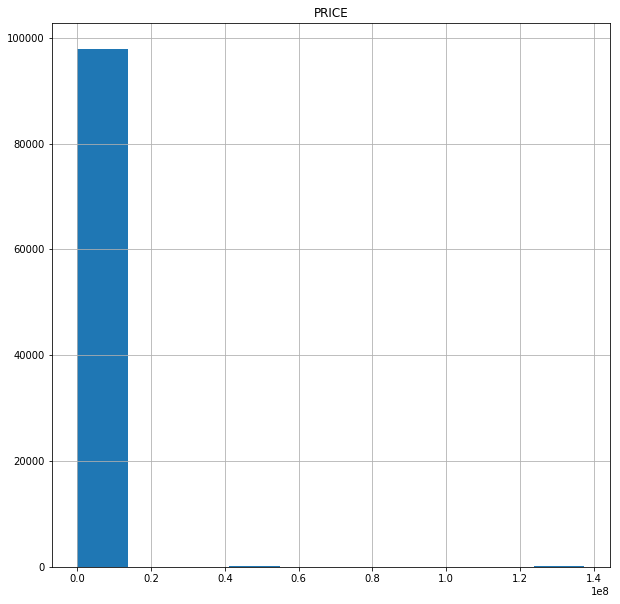

In [7]:
df2.hist(figsize=(10,10))

# Z-Score Standardization

In [8]:
scaler = StandardScaler()

zscore = scaler.fit_transform(df2[['PRICE']])
zscore.mean(),zscore.std()

(-4.630074029551846e-18, 1.0)

In [9]:
zscore_col = pd.Series(zscore.reshape(-1))
df2['zscore'] = zscore_col
df2.head()

C:\Users\KathyOlsen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PRICE,zscore
0,1095000.0,0.023175
2,2100000.0,0.094975
3,1602000.0,0.144258
5,1950000.0,0.070617
7,1050000.0,0.043710


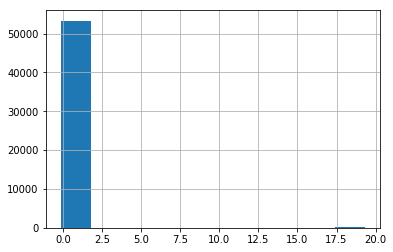

In [10]:
df2['zscore'].hist()

In [11]:
df3 = df2
df3 = df3[df3['zscore'] <0.45]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A482C88>,
      dtype=object)

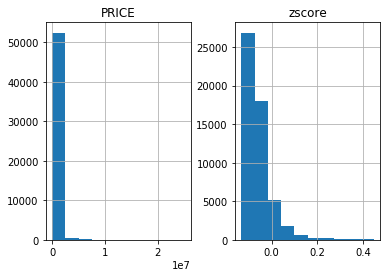

In [12]:
df3.hist()

# Min-Max Scaling

In [13]:
minmax_sc = MinMaxScaler()

minmax = minmax_sc.fit_transform(df2[['PRICE']])
minmax.mean(), minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [14]:
minmax.min(), minmax.max()

(0.0, 0.9999999999999999)

In [15]:
minmax_col = pd.Series(minmax.reshape(-1))
df2['minmax'] = minmax_col
df2.head()

C:\Users\KathyOlsen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PRICE,zscore,minmax
0,1095000.0,0.023175,0.007968
2,2100000.0,0.094975,0.011657
3,1602000.0,0.144258,0.014189
5,1950000.0,0.070617,0.010405
7,1050000.0,0.043710,0.009023


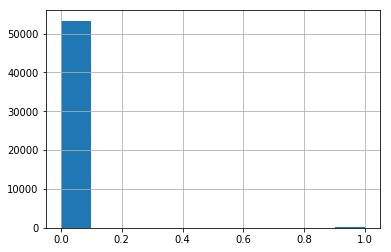

In [16]:
df2['minmax'].hist()

In [17]:
df4 = df2
df4 = df4[df4['minmax'] <0.03]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A5010F0>,
      dtype=object)

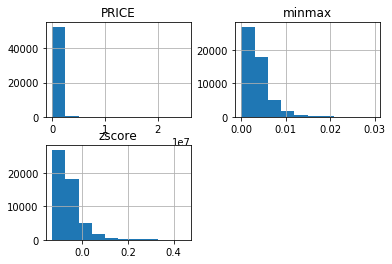

In [18]:
df4.hist()

In [19]:
df2.median()

PRICE     399999.000000
zscore        -0.074384
minmax         0.002955
dtype: float64

In [20]:
df2.mean()

PRICE     931351.594934
zscore        -0.005101
minmax         0.006515
dtype: float64

In [21]:
df4.mean()

PRICE     608067.879387
zscore        -0.058643
minmax         0.003764
dtype: float64

In [22]:
#Due to the ultra-high-end outlier (home sold for $134 million) there is a large disparity 
#between median and mean and it is hard to see the shape of the price data unless the upper range
#is limited to under half a standard deviation. 